In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [128]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.datetime(2016, 8, 23)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.prcp, measurement.date, measurement.station).\
    filter(measurement.date > year_ago).all()

In [132]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcps0 = pd.DataFrame(results)

In [133]:
# Sort the dataframe by date
prcps = prcps0.iloc[1875:2224]
prcps.sort_values(by=['date'], inplace=True)

/Users/evanreeves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
prcps1 = prcps.set_index('date')
prcps2 = prcps1.dropna()

In [135]:
precipitation = []
precipitation = [i for i in prcps2['prcp']]
precipitation_array = np.array(precipitation)

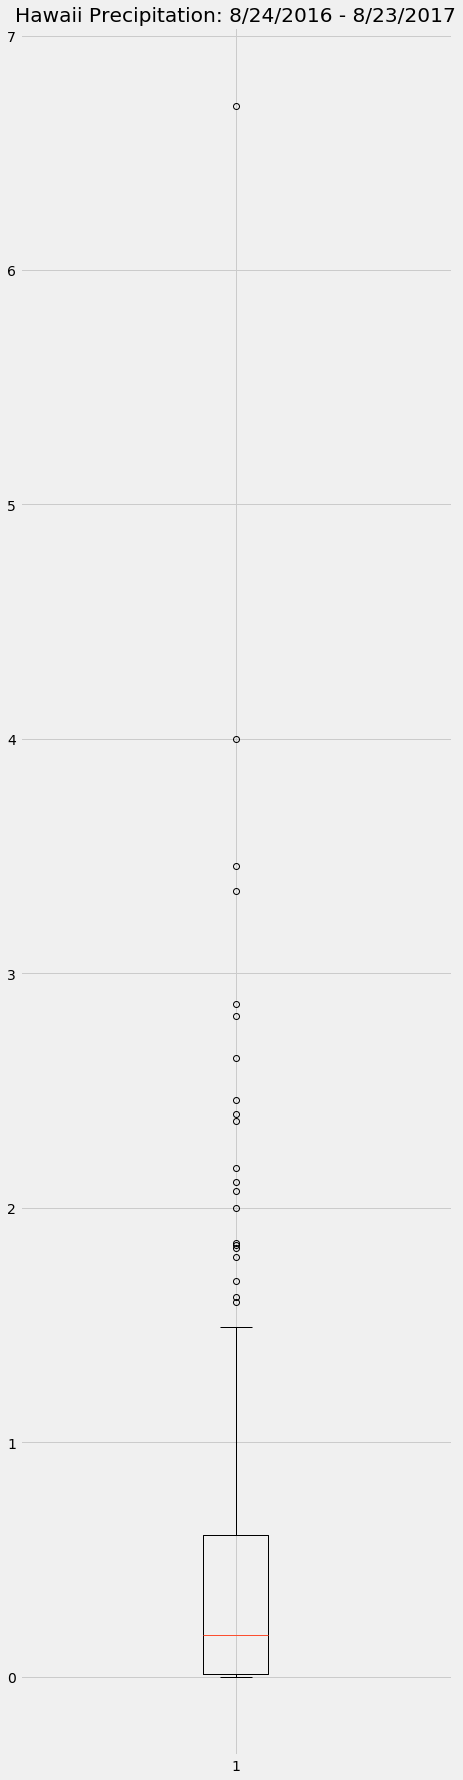

In [136]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
#x = range(len(prcps1))
ax = plt.axes([0,0,1,6])
ax.boxplot(precipitation_array)
ax.set_title('Hawaii Precipitation: 8/24/2016 - 8/23/2017')
#fig.tight_layout()
plt.show()

In [94]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(f"Minimum precipitation: {prcps2['prcp'].min()}")
print(f"Maximum precipitation: {prcps2['prcp'].max()}")
print(f"Mean precipitation: {prcps2['prcp'].mean()}")
print(f"Median precipitation: {prcps2['prcp'].median()}")

Minimum precipitation: 0.0
Maximum precipitation: 6.7
Mean precipitation: 0.4498776758409787
Median precipitation: 0.18


In [155]:
# Design a query to show how many stations are available in this dataset?
results2 = session.query(measurement.prcp, measurement.date, measurement.station, measurement.tobs).all()

In [156]:
rressulltss = pd.DataFrame(results2)
len(rressulltss['station'].unique())
#9 total stations (only one operative in the previous analysis)

9

In [157]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
rressulltss['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [165]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
df = pd.DataFrame(rressulltss['tobs'].loc[rressulltss['station'] == 'USC00519281'])
print(f"Minimum Temperature Recorded: {df['tobs'].min()}")
print(f"Maximum Temperature Recorded: {df['tobs'].max()}")
print(f"Mean Recorded Temperature: {df['tobs'].mean()}")

Minimum Temperature Recorded: 54.0
Maximum Temperature Recorded: 85.0
Mean Recorded Temperature: 71.66378066378067


In [189]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_ago = dt.datetime(2016, 8, 23)

# Perform a query to retrieve the data and precipitation scores
rs = session.query(measurement.tobs, measurement.date, measurement.station, measurement.prcp).\
    filter(measurement.date > year_ago).\
    filter(measurement.station == 'USC00519281').all()

In [190]:
rslts = pd.DataFrame(rs)


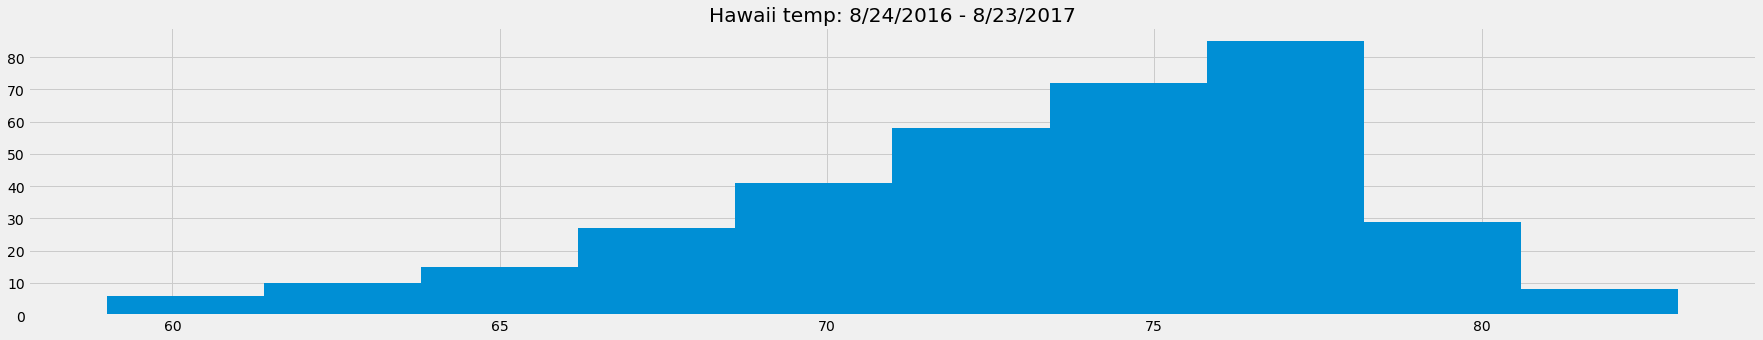

In [193]:
fig2, ax2 = plt.subplots()
ax = plt.axes([0,0,4,1])
ax.hist(rslts['tobs'])
ax.set_title('Hawaii temp: 8/24/2016 - 8/23/2017')
#fig.tight_layout()
plt.show()

In [12]:
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#Base = automap_base()
#Base.prepare(engine, reflect=True)
#measurement = Base.classes.measurement
#station = Base.classes.station
#session = Session(engine)

year_ago = dt.datetime(2016, 8, 23)
results = session.query(measurement.prcp, measurement.date, measurement.station).\
filter(measurement.date > year_ago).all()
prcps0 = pd.DataFrame(results)
prcps = prcps0.iloc[1875:2224]
prcps.sort_values(by=['date'], inplace=True)
prcps1 = prcps.set_index('date')
prcps2 = prcps1.dropna()

cipitation = prcps2.to_dict()

/Users/evanreeves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [14]:
ciptation

{'prcp': {'2016-08-24': 1.45,
  '2016-08-25': 0.11,
  '2016-08-28': 2.07,
  '2016-08-29': 0.9,
  '2016-08-30': 0.05,
  '2016-08-31': 2.46,
  '2016-09-01': 0.01,
  '2016-09-02': 0.03,
  '2016-09-03': 1.0,
  '2016-09-04': 0.44,
  '2016-09-05': 0.18,
  '2016-09-06': 1.0,
  '2016-09-07': 1.35,
  '2016-09-08': 0.15,
  '2016-09-09': 0.35,
  '2016-09-10': 1.16,
  '2016-09-11': 0.6,
  '2016-09-12': 1.04,
  '2016-09-13': 1.2,
  '2016-09-14': 6.7,
  '2016-09-15': 3.35,
  '2016-09-16': 0.61,
  '2016-09-17': 0.23,
  '2016-09-18': 0.42,
  '2016-09-19': 0.25,
  '2016-09-20': 0.43,
  '2016-09-21': 1.02,
  '2016-09-22': 0.75,
  '2016-09-23': 0.33,
  '2016-09-24': 0.27,
  '2016-09-25': 0.04,
  '2016-09-26': 1.02,
  '2016-09-27': 1.0,
  '2016-09-28': 0.05,
  '2016-09-29': 1.49,
  '2016-09-30': 0.38,
  '2016-10-01': 1.02,
  '2016-10-02': 0.61,
  '2016-10-03': 0.46,
  '2016-10-04': 3.46,
  '2016-10-05': 0.81,
  '2016-10-06': 0.04,
  '2016-10-07': 0.01,
  '2016-10-08': 0.04,
  '2016-10-09': 0.0,
  '2016-10

In [15]:
prcps2

,prcp,station
date,,
2016-08-24,1.45,USC00516128
2016-08-25,0.11,USC00516128
2016-08-28,2.07,USC00516128
2016-08-29,0.90,USC00516128
2016-08-30,0.05,USC00516128
...,...,...
2017-08-17,0.13,USC00516128
2017-08-19,0.09,USC00516128
2017-08-21,0.56,USC00516128
